In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
import statsmodels.api as sm

In [3]:
df = sm.datasets.macrodata.load_pandas().data

In [4]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [5]:
df.head() #lets set year to DatetimeIndex  #Starts at 1959 Quarter 1

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
df.tail()  #ends at 2009 Quarter 3

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [7]:
sm.tsa.datetools.dates_from_range(start="1959Q1", end="2009Q3") #gives me a list of all dates in between start 
#and end in format of datetime.datetime

[datetime.datetime(1959, 3, 31, 0, 0),
 datetime.datetime(1959, 6, 30, 0, 0),
 datetime.datetime(1959, 9, 30, 0, 0),
 datetime.datetime(1959, 12, 31, 0, 0),
 datetime.datetime(1960, 3, 31, 0, 0),
 datetime.datetime(1960, 6, 30, 0, 0),
 datetime.datetime(1960, 9, 30, 0, 0),
 datetime.datetime(1960, 12, 31, 0, 0),
 datetime.datetime(1961, 3, 31, 0, 0),
 datetime.datetime(1961, 6, 30, 0, 0),
 datetime.datetime(1961, 9, 30, 0, 0),
 datetime.datetime(1961, 12, 31, 0, 0),
 datetime.datetime(1962, 3, 31, 0, 0),
 datetime.datetime(1962, 6, 30, 0, 0),
 datetime.datetime(1962, 9, 30, 0, 0),
 datetime.datetime(1962, 12, 31, 0, 0),
 datetime.datetime(1963, 3, 31, 0, 0),
 datetime.datetime(1963, 6, 30, 0, 0),
 datetime.datetime(1963, 9, 30, 0, 0),
 datetime.datetime(1963, 12, 31, 0, 0),
 datetime.datetime(1964, 3, 31, 0, 0),
 datetime.datetime(1964, 6, 30, 0, 0),
 datetime.datetime(1964, 9, 30, 0, 0),
 datetime.datetime(1964, 12, 31, 0, 0),
 datetime.datetime(1965, 3, 31, 0, 0),
 datetime.datetime(

In [8]:
index = pd.Index(sm.tsa.datetools.dates_from_range(start="1959Q1", end="2009Q3"))

In [9]:
df.index = index

In [10]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


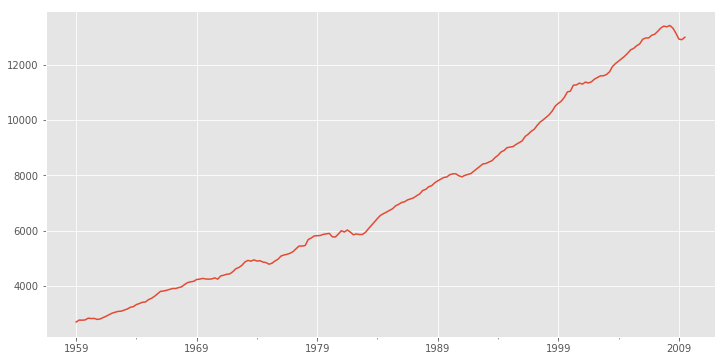

In [64]:
df['realgdp'].plot(figsize=(12,6))
plt.style.use('ggplot')

## Using Statsmodels to get the trend
The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

In [12]:
result = sm.tsa.filters.hpfilter(df['realgdp'])

In [13]:
result[0]

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
1960-06-30     23.040242
1960-09-30     -1.355312
1960-12-31    -67.462365
1961-03-31    -81.367438
1961-06-30    -60.167890
1961-09-30    -46.369224
1961-12-31    -20.695339
1962-03-31     -2.162153
1962-06-30     -4.718648
1962-09-30    -13.556457
1962-12-31    -44.369262
1963-03-31    -43.320274
1963-06-30    -44.546971
1963-09-30    -26.298758
1963-12-31    -44.261196
1964-03-31    -14.434412
1964-06-30    -20.266867
1964-09-30    -19.137001
1964-12-31    -54.824590
1965-03-31    -15.962445
1965-06-30    -13.740115
1965-09-30     13.254828
1965-12-31     56.030402
1966-03-31    103.074337
1966-06-30     72.175348
                 ...    
2002-06-30    -95.260035
2002-09-30   -114.798768
2002-12-31   -190.025905
2003-03-31   -221.225647
2003-06-30   -207.139428
2003-09-30    -89.685415
2003-12-31    -61.895316
2004-03-31    -56.628782
2004-06-30    -49.616781


In [14]:
result[1] #result is a tuple of 2 items

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
1960-06-30     2811.349758
1960-09-30     2840.377312
1960-12-31     2870.078365
1961-03-31     2900.631438
1961-06-30     2932.172890
1961-09-30     2964.788224
1961-12-31     2998.525339
1962-03-31     3033.403153
1962-06-30     3069.427648
1962-09-30     3106.603457
1962-12-31     3144.932262
1963-03-31     3184.407274
1963-06-30     3224.993971
1963-09-30     3266.630758
1963-12-31     3309.228196
1964-03-31     3352.680412
1964-06-30     3396.853867
1964-09-30     3441.606001
1964-12-31     3486.781590
1965-03-31     3532.213445
1965-06-30     3577.700115
1965-09-30     3623.030172
1965-12-31     3667.983598
1966-03-31     3712.348663
1966-06-30     3755.948652
                  ...     
2002-06-30    11634.030035
2002-09-30    11711.228768
2002-12-31    11788.849905
2003-03-31    11867.044647
2003-06-30    11945.845428
2003-09-30    12025.146415
2

In [15]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [16]:
df['trend'] = gdp_trend

In [17]:
df['cycle'] = gdp_cycle

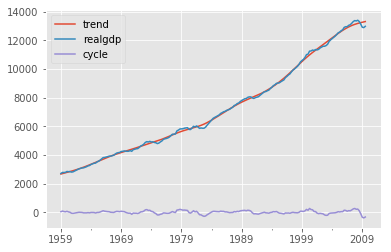

In [18]:
df[['trend','realgdp','cycle']].plot()

In [19]:
# lets see it after 2000

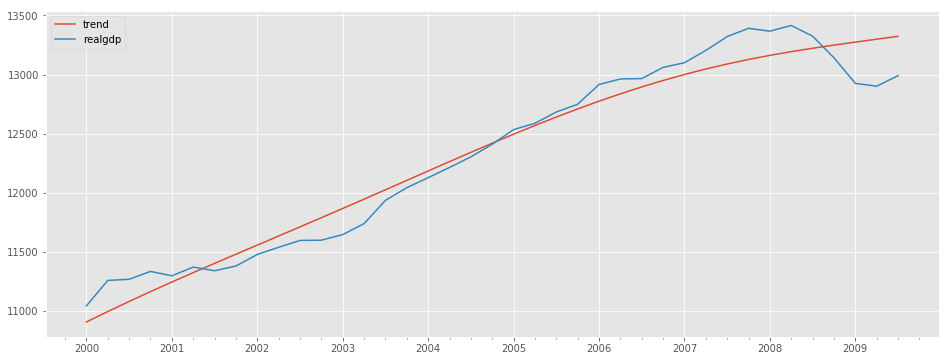

In [20]:
df[['trend','realgdp']]["2000":].plot(figsize=(16,6)) #cycle needs scaling

## EWMA Model

In [21]:
airline = pd.read_csv("airline_passengers.csv")

In [22]:
airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [23]:
airline.index  #It ain't a datetime index even when I set parse_dates=True because of NULL values

RangeIndex(start=0, stop=145, step=1)

In [24]:
airline["Thousands of Passengers"].hasnans

True

In [25]:
airline.dropna(inplace=True)

In [26]:
airline.index = pd.to_datetime(airline['Month'])

In [27]:
airline.head()

,Month,Thousands of Passengers
Month,,
1949-01-01,1949-01,112.0
1949-02-01,1949-02,118.0
1949-03-01,1949-03,132.0
1949-04-01,1949-04,129.0
1949-05-01,1949-05,121.0


In [28]:
airline.drop(axis=1,columns="Month",inplace=True)

In [29]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [30]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(12).mean()

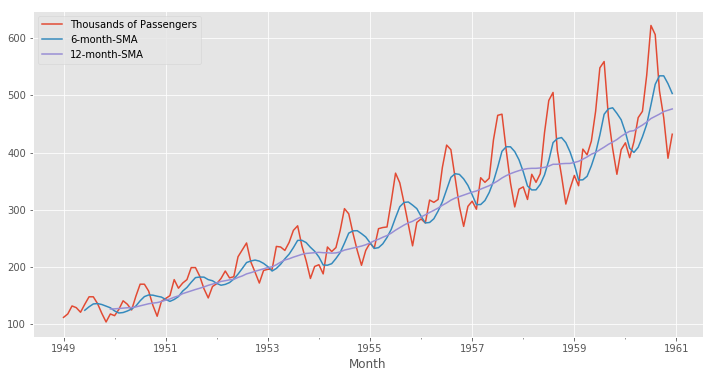

In [31]:
airline.plot(figsize=(12,6))
plt.legend()

In [32]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

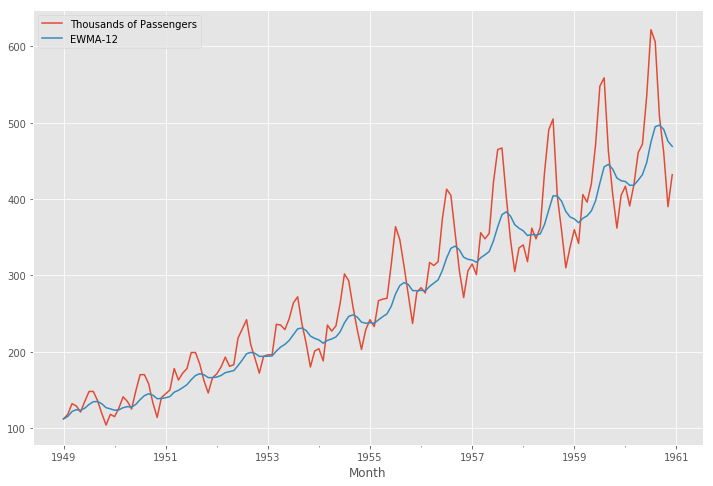

In [33]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(12,8))
plt.legend()

### ETS Decomposition

In [35]:
airline = pd.read_csv("airline_passengers.csv", index_col="Month")

In [36]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


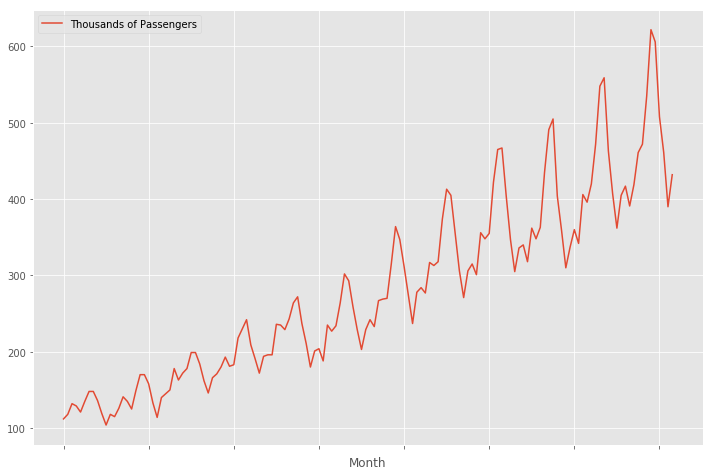

In [37]:
airline.plot(figsize=(12,8))

### There is some Trend & Seasonality in this

In [39]:
airline.dropna(inplace=True)

In [40]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [41]:
airline.index = pd.to_datetime(airline.index)

In [42]:
airline.index  #VOILA! its of type DatetimeIndex :*

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
# Lets decompose it out

In [58]:
result = sm.tsa.seasonal_decompose(airline["Thousands of Passengers"])

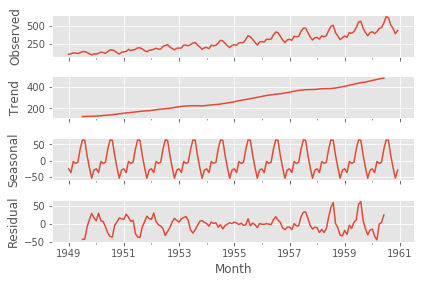

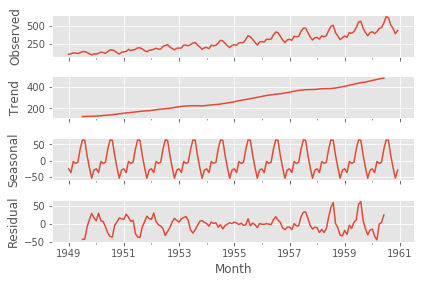

In [59]:
result.plot()

In [60]:
result = sm.tsa.seasonal_decompose(airline["Thousands of Passengers"],model="multiplicative")

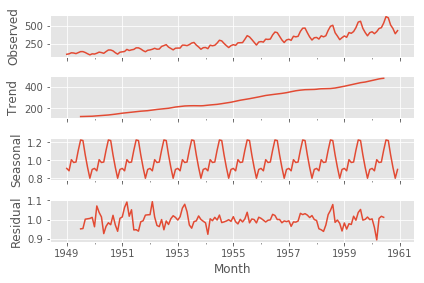

In [65]:
fig = result.plot()

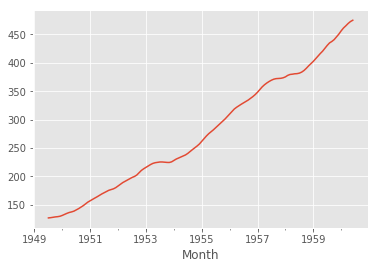

In [62]:
result.trend.plot()

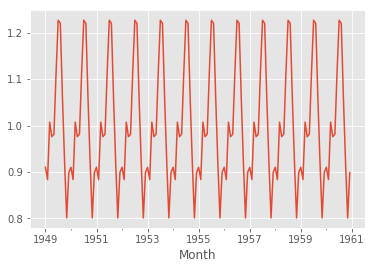

In [63]:
result.seasonal.plot()

# ARIMA Models
The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model
* Use the model to make predictions


In [67]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv")

In [68]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [70]:
df.columns = ['Month', 'Milk in Pounds per Cow']

In [71]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [72]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [80]:
df.dropna(inplace=True)

In [81]:
df['Milk in Pounds per Cow'].hasnans

False

In [82]:
df['Milk in Pounds per Cow'].all()

True

In [83]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [84]:
df['Month'] = pd.to_datetime(df['Month'])

In [85]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [87]:
df.set_index('Month',inplace=True)

In [88]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
Milk in Pounds per Cow    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


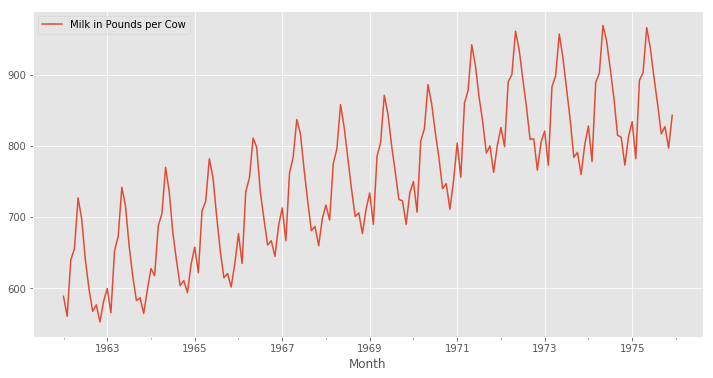

In [97]:
df.plot(figsize=(12,6));   #GGplot i.e. R-style

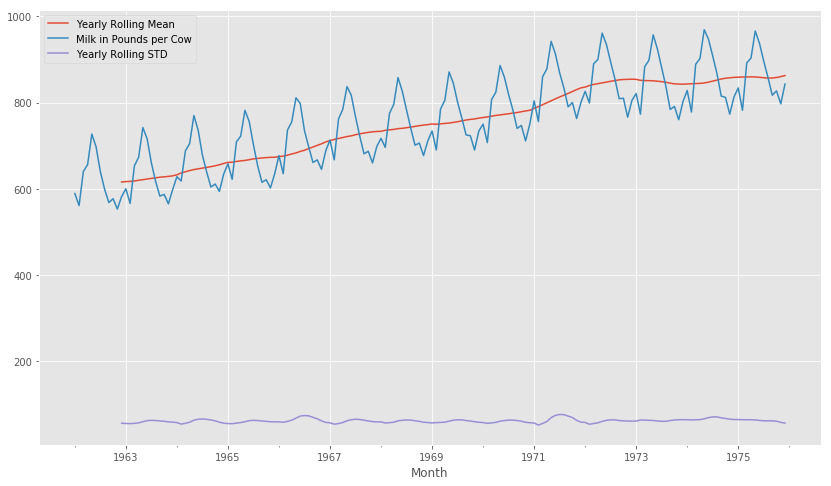

In [100]:
#Lets Plot Some Graphs Now!
df['Milk in Pounds per Cow'].rolling(12).mean().plot(label="Yearly Rolling Mean")
df['Milk in Pounds per Cow'].plot(figsize=(14,8))
df['Milk in Pounds per Cow'].rolling(12).std().plot(label="Yearly Rolling STD")
plt.legend()

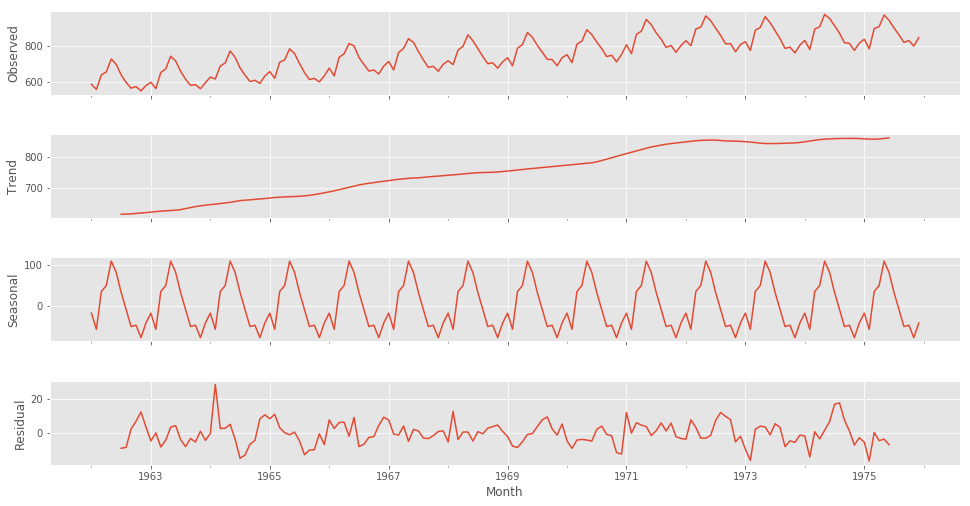

In [103]:
#ETS DECOMPOSITION
result = sm.tsa.seasonal_decompose(df['Milk in Pounds per Cow'])
fig= result.plot()
fig.set_size_inches(15,8)